##**Grupo 13: Cristian Amezquita / Madeleine Gil**

# **Guía 3**

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/EAN

/content/drive/MyDrive/Colab Notebooks/EAN


In [ ]:
# Solución propuesta

# Carga del conjunto de datos y visualización de las 10 primeras filas
import pandas as pd
## Leer la base de datos
data_accidentes = pd.read_csv("Guia_3/accidents-1.csv", delimiter=';')
data_accidentes.head(10)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
5,08/20/2019,7:15,QUEENS,11354.0,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4191802,Sedan,NaN,NaN,NaN,NaN
6,08/19/2019,12:00,QUEENS,11422.0,40.669327,-73.735330,241 STREET,0,0,0,...,Unspecified,NaN,NaN,NaN,4191196,Sedan,Sedan,NaN,NaN,NaN
7,09/22/2018,11:25,BRONX,10465.0,40.836227,-73.822920,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4004118,Sedan,NaN,NaN,NaN,NaN
8,09/22/2018,15:56,BRONX,10451.0,40.819298,-73.921880,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3985745,Sedan,NaN,NaN,NaN,NaN
9,08/18/2019,12:43,BRONX,10451.0,NaN,NaN,EAST 149 STREET,0,0,0,...,Passing Too Closely,NaN,NaN,NaN,4191092,Sedan,Sedan,NaN,NaN,NaN


### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [ ]:
# Solución propuesta
# Crear la base de datos como un data frame y mostrar las primeras 5 filas del DataFrame
df = pd.DataFrame(data_accidentes)
print(df)

              DATE   TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0       09/26/2018  12:12     BRONX   10454.0  40.808987 -73.911316   
1       09/25/2018  16:30  BROOKLYN   11236.0  40.636005 -73.912510   
2       08/22/2019  19:30    QUEENS   11101.0  40.755490 -73.939530   
3       09/23/2018  13:10    QUEENS   11367.0        NaN        NaN   
4       08/20/2019  22:40     BRONX   10468.0  40.868336 -73.901270   
...            ...    ...       ...       ...        ...        ...   
238517  01/20/2018  15:00    QUEENS   11436.0  40.685356 -73.797230   
238518  01/04/2018  14:00     BRONX   10452.0  40.845180 -73.914170   
238519  01/20/2018  13:05     BRONX   10462.0  40.831210 -73.850876   
238520  01/29/2018  17:45    QUEENS   11377.0  40.757250 -73.904854   
238521  01/23/2018  16:38  BROOKLYN   11211.0  40.710197 -73.958430   

                          ON STREET NAME  NUMBER OF PEDESTRIANS INJURED  \
0                                    NaN                              0 

In [ ]:
# Información general del dataset, incluyendo los tipos de datos:
print("Información general del df y tipo de datos:")
print(df.info())

Información general del df y tipo de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATE                           238522 non-null  object 
 1   TIME                           238522 non-null  object 
 2   BOROUGH                        238522 non-null  object 
 3   ZIP CODE                       238452 non-null  float64
 4   LATITUDE                       231544 non-null  float64
 5   LONGITUDE                      231544 non-null  float64
 6   ON STREET NAME                 153918 non-null  object 
 7   NUMBER OF PEDESTRIANS INJURED  238522 non-null  int64  
 8   NUMBER OF PEDESTRIANS KILLED   238522 non-null  int64  
 9   NUMBER OF CYCLIST INJURED      238522 non-null  int64  
 10  NUMBER OF CYCLIST KILLED       238522 non-null  int64  
 11  NUMBER OF MOTORIST INJURED     238522 non-null 

In [ ]:
# Paso 1:
# Identifica si hay valores nulos en alguna columna:
print(" Valores faltantes en cada columna:")
print(df.isnull().sum())

 Valores faltantes en cada columna:
DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                             70
LATITUDE                           6978
LONGITUDE                          6978
ON STREET NAME                    84604
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       884
CONTRIBUTING FACTOR VEHICLE 2     40008
CONTRIBUTING FACTOR VEHICLE 3    225450
CONTRIBUTING FACTOR VEHICLE 4    235666
CONTRIBUTING FACTOR VEHICLE 5    237730
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1721
VEHICLE TYPE CODE 2               55590
VEHICLE TYPE CODE 3              226221
VEHICLE TYPE CODE 4              235806
VEHICLE TYPE CODE 5              237769
dtyp

In [ ]:
# Paso 2:
# Metodo de imputación de los datos faltantes:
# ZIP CODE: se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH.

# Imputación con la moda (valor más frecuente)
df_imputacion = df.copy()
df_imputacion['ZIP CODE'] = df_imputacion['ZIP CODE'].fillna(df_imputacion['ZIP CODE'].mode()[0]) #fillna llenará los valores nulos con el valor más frecuente.

In [ ]:
# Paso 2:
# Metodo de imputación de los datos faltantes:
# LATITUDE y LONGITUDE: se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio.

# Imputación con la media
df_imputacion['LATITUDE'] = df_imputacion.groupby('BOROUGH')['LATITUDE'].transform('mean')
df_imputacion['LONGITUDE'] = df_imputacion.groupby('BOROUGH')['LONGITUDE'].transform('mean')

In [ ]:
# Paso 2:
# Metodo de imputación de los datos faltantes:
# ON STREET NAME: será rellenada con "UNKNOWN" en caso de estar vacía.

# Imputación
df_imputacion['ON STREET NAME'] = df_imputacion['ON STREET NAME'].fillna('UNKNOWN')

In [ ]:
# Paso 2:
# Metodo de imputación de los datos faltantes:
# CONTRIBUTING FACTOR VEHICLE X: los valores nulos serán sustituidos por "Unspecified"

# Imputación
df_imputacion['CONTRIBUTING FACTOR VEHICLE 1'] = df_imputacion['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified')
df_imputacion['CONTRIBUTING FACTOR VEHICLE 2'] = df_imputacion['CONTRIBUTING FACTOR VEHICLE 2'].fillna('Unspecified')
df_imputacion['CONTRIBUTING FACTOR VEHICLE 3'] = df_imputacion['CONTRIBUTING FACTOR VEHICLE 3'].fillna('Unspecified')
df_imputacion['CONTRIBUTING FACTOR VEHICLE 4'] = df_imputacion['CONTRIBUTING FACTOR VEHICLE 4'].fillna('Unspecified')
df_imputacion['CONTRIBUTING FACTOR VEHICLE 5'] = df_imputacion['CONTRIBUTING FACTOR VEHICLE 5'].fillna('Unspecified')

In [ ]:
# Paso 2:
# Metodo de imputación de los datos faltantes:
# VEHICLE TYPE CODE X: los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

# Imputación
df_imputacion['VEHICLE TYPE CODE 1'] = df_imputacion['VEHICLE TYPE CODE 1'].fillna('Unknown')
df_imputacion['VEHICLE TYPE CODE 2'] = df_imputacion['VEHICLE TYPE CODE 2'].fillna('Unknown')
df_imputacion['VEHICLE TYPE CODE 3'] = df_imputacion['VEHICLE TYPE CODE 3'].fillna('Unknown')
df_imputacion['VEHICLE TYPE CODE 4'] = df_imputacion['VEHICLE TYPE CODE 4'].fillna('Unknown')
df_imputacion['VEHICLE TYPE CODE 5'] = df_imputacion['VEHICLE TYPE CODE 5'].fillna('Unknown')

In [ ]:
df_imputacion.BOROUGH.unique()

array(['BRONX', 'BROOKLYN', 'QUEENS', 'MANHATTAN', 'STATEN ISLAND'],
      dtype=object)

In [ ]:
# Incorporar la columna área al df y calcular la densidad
area_municipios = {
    "BRONX": 42.2,
    "BROOKLYN": 69.4,
    "QUEENS": 108.7,
    "MANHATTAN": 22.7,
    "STATEN ISLAND": 57.5
}
# asignar el área correspondiente según municipio
df_imputacion['AREA'] = df_imputacion['BOROUGH'].map(area_municipios)

# Necesito calcular el número de accidentes por cada ciudad:
df_imputacion['NUMBER OF ACCIDENTS'] = df_imputacion.groupby('BOROUGH')['BOROUGH'].transform('size') # utilizó size dado que este permite contar valores nulos.

#Calcular la densidad de accidentes:
df_imputacion['DENSITY'] = df_imputacion['NUMBER OF ACCIDENTS'] / df_imputacion['AREA']

In [ ]:
# Solucion propuesta 2

# Crear una copia de accidents
df_imputacion = df.copy()

# Reemplazar los valores faltantes de la variable 'zipcode' por la moda por barrio
df_imputacion['ZIP CODE'].fillna(df_imputacion.groupby('BOROUGH')['ZIP CODE'].transform(lambda x: x.mode()[0]), inplace = True)
        # transform() aplica la función lambda(moda) a cada grupo manteniendo la longitud del dataframe.
        # adicionalmente, se usa lambda ya que mode() puede devolver varios valores por cada grupo y se requiere solo uno.

# Reemplazar los valores faltantes de la variable 'longitude' y 'latitude' por la media por barrio
df_imputacion['LONGITUDE'].fillna(df_imputacion.groupby('BOROUGH')['LONGITUDE'].transform('mean'), inplace = True)
df_imputacion['LATITUDE'].fillna(df_imputacion.groupby('BOROUGH')['LATITUDE'].transform('mean'), inplace = True)

# Reemplazar los valores faltantes de la variable 'on street name' por 'unknown'
df_imputacion['ON STREET NAME'].fillna('UNKNOWN', inplace = True)

# Reemplazar los valores faltantes de las variables 'vehicle type code X' por 'unknown'
vehicle_type = [col for col in df_imputacion.columns if col.startswith('VEHICLE TYPE CODE')]
df_imputacion[vehicle_type] = df_imputacion[vehicle_type].fillna('unknown')

# Reemplazar los valores faltantes de las variables 'contributing factor vehicle X' por 'unspecified'
factor = [col for col in df_imputacion.columns if col.startswith('CONTRIBUTING FACTOR VEHICLE')]
df_imputacion[factor] = df_imputacion[factor].fillna('Unspecified')

print(df_imputacion.info())

### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [ ] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [ ] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [X] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [X] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [ ] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [X] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


In [ ]:
# Solución propuesta

import pandas as pd
import plotly.express as px

# Se debe convertir la columna de fecha a datetime
df_imputacion['DATE'] = pd.to_datetime(df_imputacion['DATE'])

# luego agrupo los datos por mes para realizar el conteo de los accidentes
df_imputacion_mes = df_imputacion.groupby(df_imputacion['DATE'].dt.to_period('M')).size().reset_index(name="NUMBER OF ACCIDENTS")

# convertir la columna de fecha a tipo string
df_imputacion_mes['DATE'] = df_imputacion_mes['DATE'].astype(str)

# crear el grafico
fig = px.line(df_imputacion_mes, x='DATE', y='NUMBER OF ACCIDENTS', title='Accidentes por mes')
fig.show()

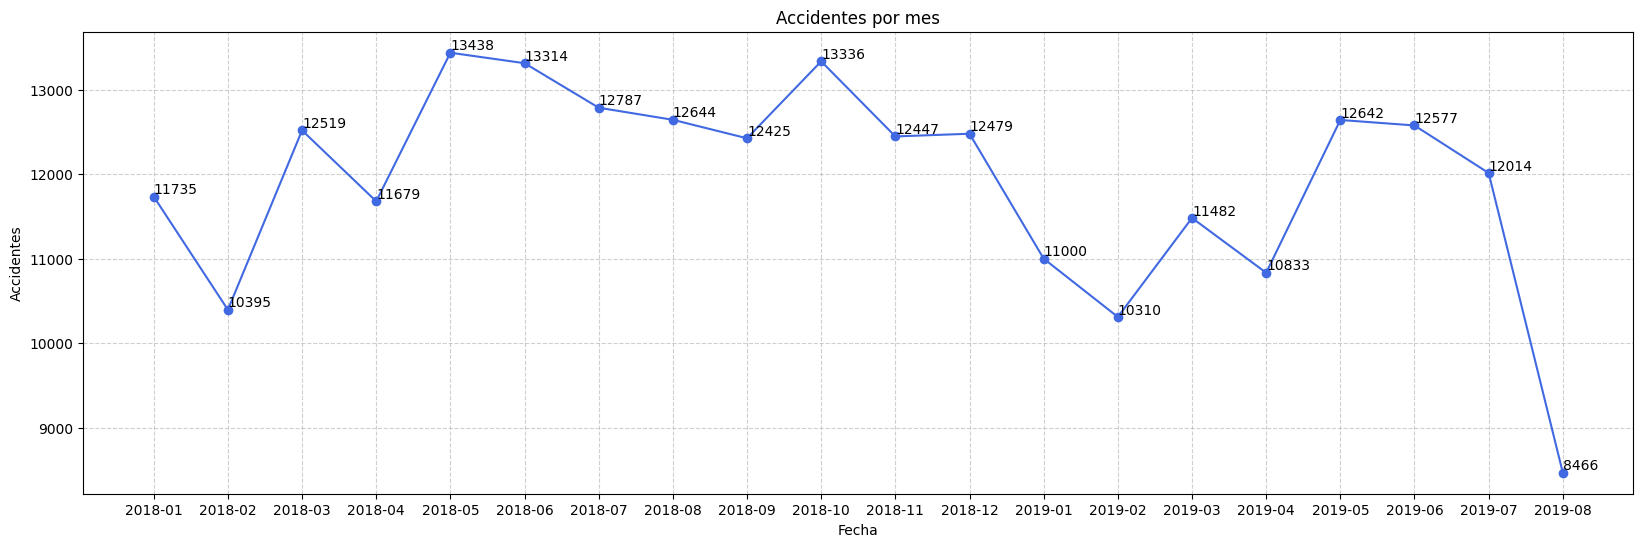

In [ ]:
# Propuesta de mejora del gráfico:
import matplotlib.pyplot as plt

# Creo la figura y el gráfico
plt.figure(figsize=(20, 6))
plt.plot(df_imputacion_mes['DATE'], df_imputacion_mes['NUMBER OF ACCIDENTS'], marker='o', linestyle='-', color='royalblue')
# etiquetas
plt.xlabel('Fecha')
plt.ylabel('Accidentes')
plt.title('Accidentes por mes')
plt.grid(True, linestyle="--", alpha=0.6)

# agregar las etiquetas a los marcadores de los meses
for x, y in zip(df_imputacion_mes["DATE"], df_imputacion_mes["NUMBER OF ACCIDENTS"]):
    plt.text(x, y, str(y), fontsize=10, ha='left', va='bottom')

plt.show()

In [ ]:
#como saber si los meses tienen los 30 días o si alguno tiene menos días
df_imputacion_mes_dias = df_imputacion.groupby(df_imputacion['DATE'].dt.to_period('M'))['DATE'].nunique().reset_index(name="DIAS_UNICOS")
filtro = df_imputacion_mes_dias[df_imputacion_mes_dias['DIAS_UNICOS'] <= 31]
print(filtro)

       DATE  DIAS_UNICOS
0   2018-01           31
1   2018-02           28
2   2018-03           31
3   2018-04           30
4   2018-05           31
5   2018-06           30
6   2018-07           31
7   2018-08           31
8   2018-09           30
9   2018-10           31
10  2018-11           30
11  2018-12           31
12  2019-01           31
13  2019-02           28
14  2019-03           31
15  2019-04           30
16  2019-05           31
17  2019-06           30
18  2019-07           31
19  2019-08           24


In [ ]:
# Promedio de accidentes por mes
promedio_accidentes = df_imputacion_mes['NUMBER OF ACCIDENTS'].mean()
print("El promedio de accidentes por mes es:", promedio_accidentes)

El promedio de accidentes por mes es: 11926.1


**Pregunta: ¿Ha aumentado el número de accidentes durante el último año y medio?**

**Respuesta:**
El número de accidentes desde enero de 2018 hasta agosto de 2019 tiene un promedio de 11.926. En la grafica se observa que, de mayo a diciembre de 2018, el número de accidentes se mantiene por encima del promedio y sigue una tendencia decreciente hasta mayo de 2019, cuando vuelve a superarlo.

Es importante mencionar que, en agosto de 2019, los datos corresponden únicamente a 24 días del mes, lo que podría afectar la interpretación de la tendencia en este periodo.

**Pregunta:**

El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

**Respuesta:**

No tendremos en cuenta el mes de agosto de 2019, ya que solo contiene registros de 24 días. Febrero es el mes con menor número de accidentes en ambos años. Aunque no se cuenta con una explicación definitiva, es posible que esto se deba a que febrero es un mes frío y, al ser invierno, las personas prefieren no salir de sus casas.

En contraste, los meses de junio a septiembre corresponden al verano, lo que incentiva a más personas a salir. Según los datos, estos meses presentan un número significativo de accidentes.

In [ ]:
# Ordenar los accidentes de menor a mayor
acc_orden = df_imputacion_mes.sort_values(by='NUMBER OF ACCIDENTS', ascending=True)
print(acc_orden)

       DATE  NUMBER OF ACCIDENTS
19  2019-08                 8466
13  2019-02                10310
1   2018-02                10395
15  2019-04                10833
12  2019-01                11000
14  2019-03                11482
3   2018-04                11679
0   2018-01                11735
18  2019-07                12014
8   2018-09                12425
10  2018-11                12447
11  2018-12                12479
2   2018-03                12519
17  2019-06                12577
16  2019-05                12642
7   2018-08                12644
6   2018-07                12787
5   2018-06                13314
9   2018-10                13336
4   2018-05                13438


### Exjercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

In [ ]:
# Solución propuesta

# Cómo varía el número de accidentes a lo largo de un solo día
# Dado que la columna TIME tiene la hora exacta de los accidentes, se debe convertir a un formato de hora para poder saber el número de accidentes
df_imputacion["DATE"] = pd.to_datetime(df_imputacion["DATE"], format="%m%d%Y")
df_imputacion["HOUR"] = pd.to_datetime(df_imputacion["TIME"], format="%H:%M").dt.hour # Aqui aprendí que la función dt.hour extrae solo la hora y descarta los minutos.

# Quiero poder seleccionar el mes y el día para cuantos accidentes hay, para ello se separa la columna DATE
df_imputacion["YEAR"] = df_imputacion["DATE"].dt.year
df_imputacion["MONTH"] = df_imputacion["DATE"].dt.month
df_imputacion["DAY"] = df_imputacion["DATE"].dt.day

# Agrupo por año, mes, día y hora para contar los accidentes
accidentes_por_dia = df_imputacion.groupby(["YEAR", "MONTH", "DAY", "HOUR"]).size().reset_index(name="NUMBER OF ACCIDENTS")
accidentes_por_dia

,YEAR,MONTH,DAY,HOUR,NUMBER OF ACCIDENTS
0,2018,1,1,0,22
1,2018,1,1,1,18
2,2018,1,1,2,20
3,2018,1,1,3,20
4,2018,1,1,4,8
...,...,...,...,...,...
14292,2019,8,24,19,14
14293,2019,8,24,20,4
14294,2019,8,24,21,13
14295,2019,8,24,22,14


In [ ]:
1# Filtrar el día, mes y año para saber los accidentes por hora
anno_filtro = int(input("Ingrese el año (2018 o 2019): "))
mes_filtro = int(input("Ingrese el mes (1-12): "))
dia_filtro = int(input("Ingrese el día(1-31): "))

# Aplicar el filtro
accidentes_filtrados = accidentes_por_dia[(accidentes_por_dia["YEAR"] == anno_filtro) & (accidentes_por_dia["MONTH"] == mes_filtro) & (accidentes_por_dia["DAY"] == dia_filtro)]
print(accidentes_filtrados)

Ingrese el año (2018 o 2019): 2018
Ingrese el mes (1-12): 10
Ingrese el día(1-31): 1
      YEAR  MONTH  DAY  HOUR  NUMBER OF ACCIDENTS
6492  2018     10    1     0                   16
6493  2018     10    1     1                    6
6494  2018     10    1     2                    2
6495  2018     10    1     3                    2
6496  2018     10    1     4                    1
6497  2018     10    1     5                    6
6498  2018     10    1     6                    6
6499  2018     10    1     7                   15
6500  2018     10    1     8                   30
6501  2018     10    1     9                   19
6502  2018     10    1    10                   21
6503  2018     10    1    11                   22
6504  2018     10    1    12                   28
6505  2018     10    1    13                   28
6506  2018     10    1    14                   31
6507  2018     10    1    15                   24
6508  2018     10    1    16                   41
6509  2018     

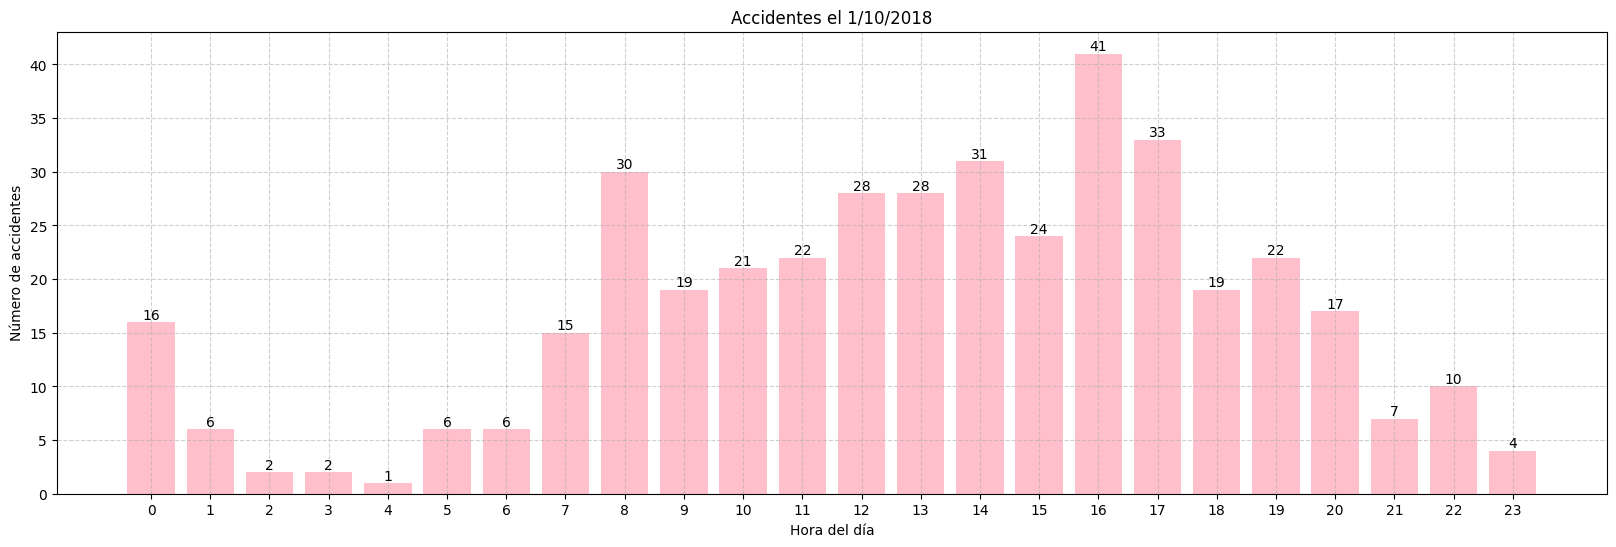

In [ ]:
# Grafico de barras de la distribución por hora a lo largo del día
plt.figure(figsize=(20, 6))
plt.bar(accidentes_filtrados["HOUR"], accidentes_filtrados["NUMBER OF ACCIDENTS"], color='pink')

#Etiquetas
plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.title(f"Accidentes el {dia_filtro}/{mes_filtro}/{anno_filtro}")
plt.xticks(range(0, 24))  # Mostrar todas las horas
plt.grid(True, linestyle="--", alpha=0.6)

# agregar las etiquetas a los marcadores de los meses
for x, y in zip(accidentes_filtrados["HOUR"], accidentes_filtrados["NUMBER OF ACCIDENTS"]):
    plt.text(x, y, str(y), fontsize=10, ha='center', va='bottom')
plt.show()

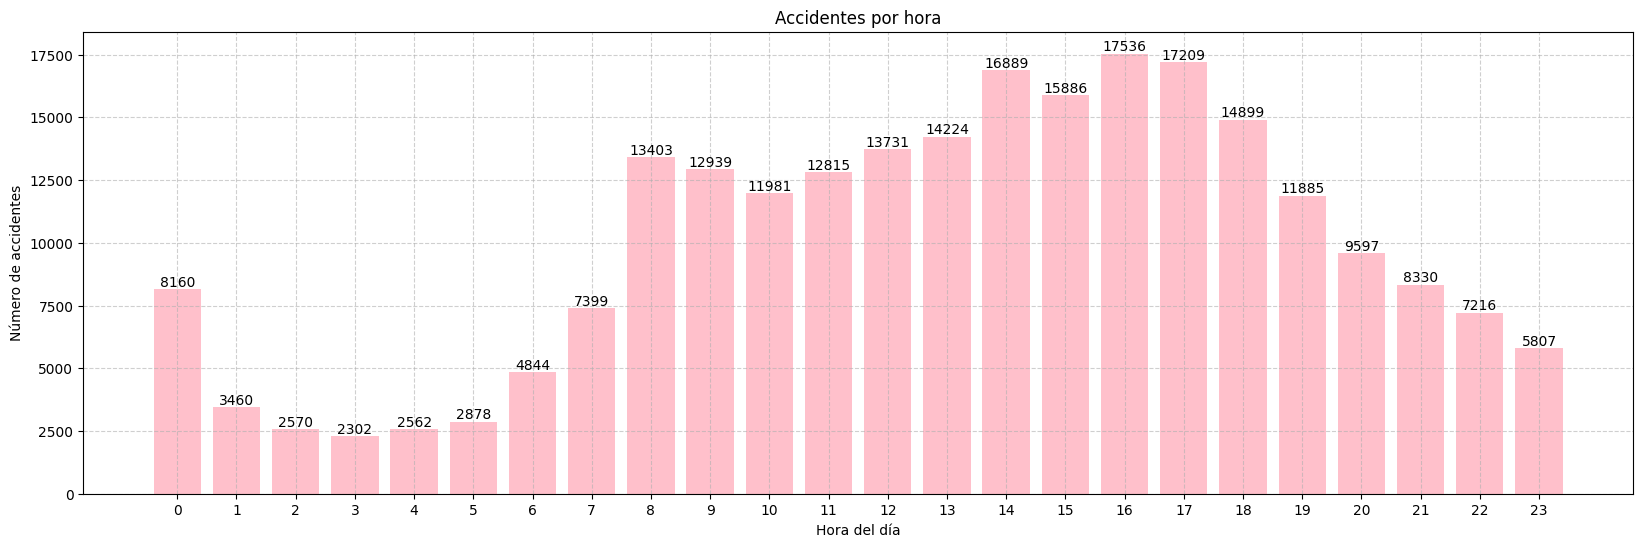

In [ ]:
# si se agrupa el número de accidentes por hora sin tener en cuenta la fecha y el lugar que ocurrieron, se obtiene:
accidentes_por_hora = df_imputacion.groupby("HOUR").size().reset_index(name="NUMBER OF ACCIDENTS")

# Grafico de barras:
plt.figure(figsize=(20, 6))
plt.bar(accidentes_por_hora["HOUR"], accidentes_por_hora["NUMBER OF ACCIDENTS"], color='pink')

#Etiquetas
plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.title('Accidentes por hora')
plt.xticks(range(0, 24))  # Mostrar todas las horas
plt.grid(True, linestyle="--", alpha=0.6)

# agregar las etiquetas a los marcadores de los meses
for x, y in zip(accidentes_por_hora["HOUR"], accidentes_por_hora["NUMBER OF ACCIDENTS"]):
    plt.text(x, y, str(y), fontsize=10, ha='center', va='bottom')
plt.show()

**Pregunta:**
¿Cómo varía el número de accidentes a lo largo de un solo día?

**Respuesta_1: primera propuesta de visualización**
El código permite al usuario seleccionar el año, mes y día para visualizar en el grafico. Una vez generado, se muestra el número de accidentes ocurridos en las 24 horas del día elegido.

Sin embargo, al analizar la variación sin condiderar otras variables, la información diaria por sí sola podría no ser concluyente o generar interpretaciones erroneas.

**Respuesta_2: segunda propuesta de visualización**
La visualización del número de accidentes por hora sin tener en cuenta la fecha y el lugar que ocurrieron, no son concluyentes y generan interpretaciones erroneas. No es posible interpretar las tendencias o comportamientos sin tener en cuenta las demás variables.


**Pregunta:**
En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

**Respuesta:**
En los analisis estadísticos es importante considerar el mayor número de variables o todas aquellas que estén disponibles para obtener interpretaciones más robustas. En este caso, ignorar la fecha y el lugar donde ocurrieron los accidentes puede limitar el análisis, ya que las variables geográficas y temporales pueden aportar un contexto clave para entender los patrones de los accidentes.

Es posible también agregar por día todos los accidentes sin tener en cuenta el año y el mes, lo que tampoco sería adecuado para entender los patrones de los accidentes.

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

In [ ]:
# Solución propuesta

# cómo varia el número de accidentes em una sola semana
# Primero se debe obtener el día de la semana (dt.weekday toma valores numericos de 0 a 6, 0 para lunes y 6 para domingo)
df_imputacion["DIA_SEMANA"] = df_imputacion["DATE"].dt.weekday

# Segundo se realiza el recuento de los accidentes para cada día
acc_dia_semana = df_imputacion.groupby("DIA_SEMANA").size().reset_index(name="NUMBER OF ACCIDENTS")

# Se reemplazan los números por los nombres de los días
dias_semana = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}
acc_dia_semana['DIA_SEMANA'] = acc_dia_semana['DIA_SEMANA'].map(dias_semana)

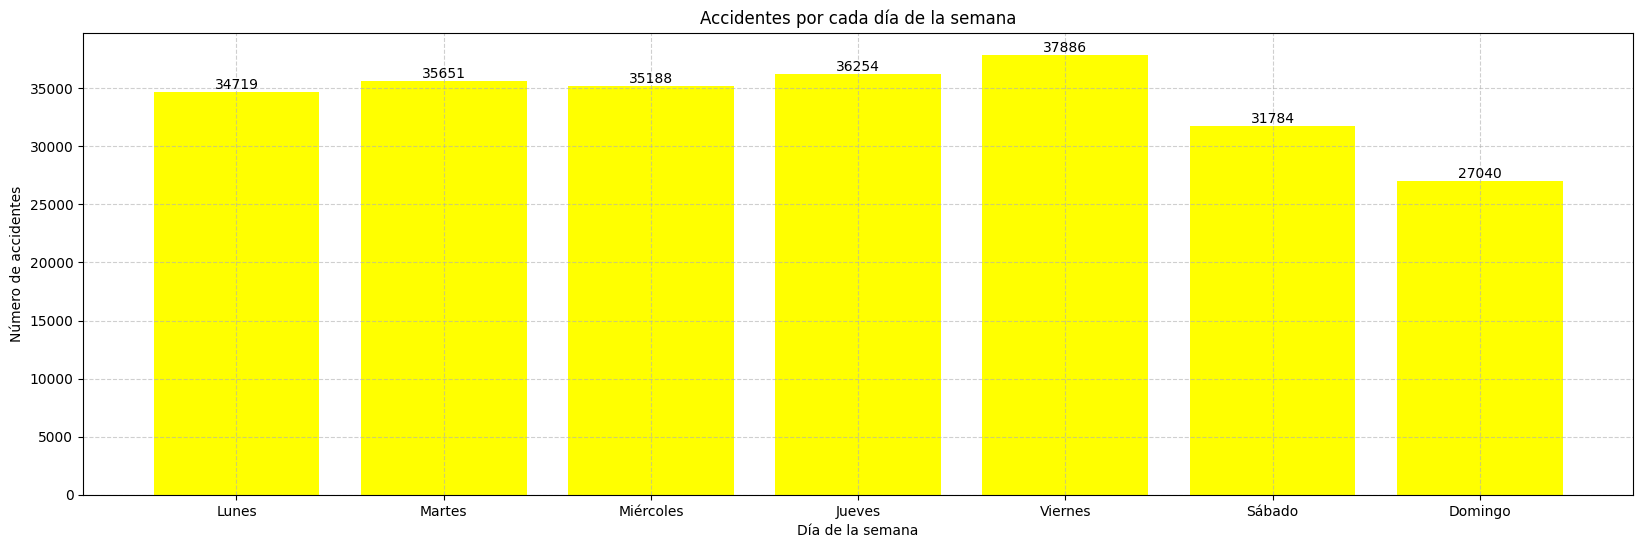

In [ ]:
# Grafico de barras:
plt.figure(figsize=(20, 6))
plt.bar(acc_dia_semana["DIA_SEMANA"], acc_dia_semana["NUMBER OF ACCIDENTS"], color='yellow')

#Etiquetas
plt.xlabel('Día de la semana')
plt.ylabel('Número de accidentes')
plt.title('Accidentes por cada día de la semana')
plt.grid(True, linestyle="--", alpha=0.6)

# agregar las etiquetas a los marcadores de los meses
for x, y in zip(acc_dia_semana["DIA_SEMANA"], acc_dia_semana["NUMBER OF ACCIDENTS"]):
    plt.text(x, y, str(y), fontsize=10, ha='center', va='bottom')
plt.show()

### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

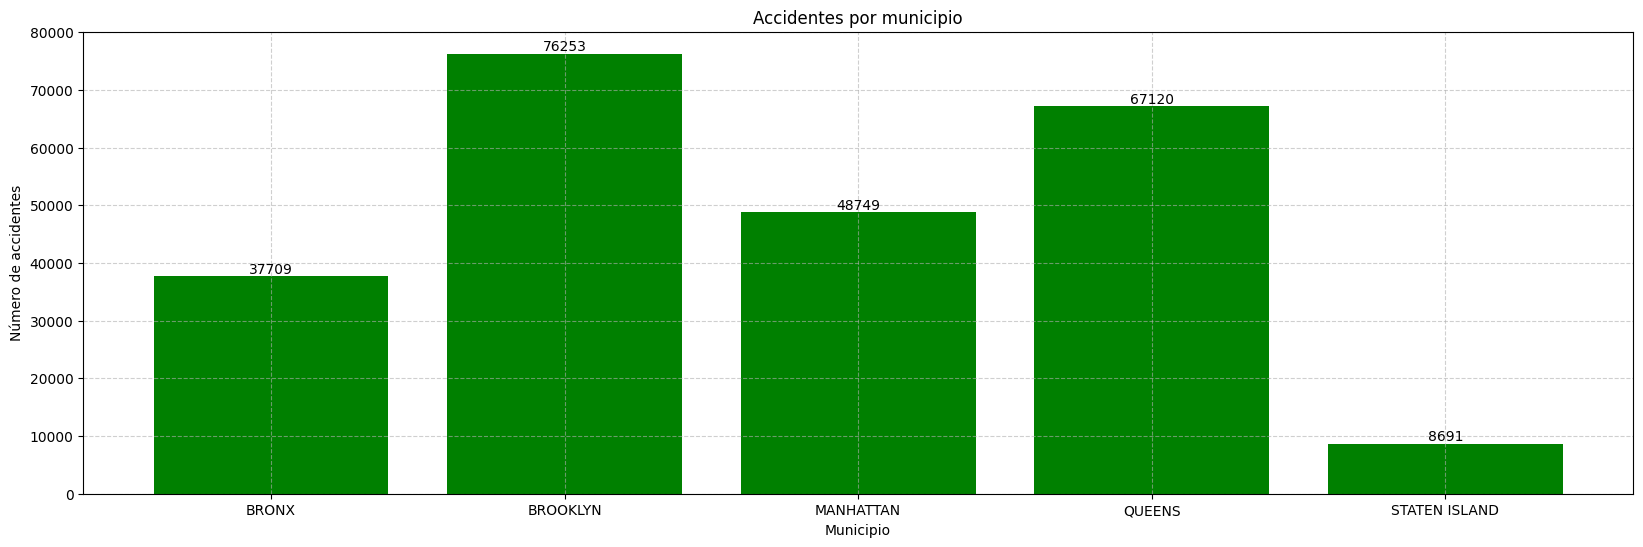

In [ ]:
# Solución propuesta

# Gráfica 1: número total de accidentes en cada municipio
acc_municipio = df_imputacion.groupby("BOROUGH").size().reset_index(name="NUMBER OF ACCIDENTS")

# Condiciones gráfico
plt.figure(figsize=(20, 6))
plt.bar(acc_municipio["BOROUGH"], acc_municipio["NUMBER OF ACCIDENTS"], color='green')

#Etiquetas
plt.xlabel('Municipio')
plt.ylabel('Número de accidentes')
plt.title('Accidentes por municipio')
plt.grid(True, linestyle="--", alpha=0.6)

# agregar las etiquetas a los marcadores de los meses
for x, y in zip(acc_municipio["BOROUGH"], acc_municipio["NUMBER OF ACCIDENTS"]):
    plt.text(x, y, str(y), fontsize=10, ha='center', va='bottom')
plt.show()

Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

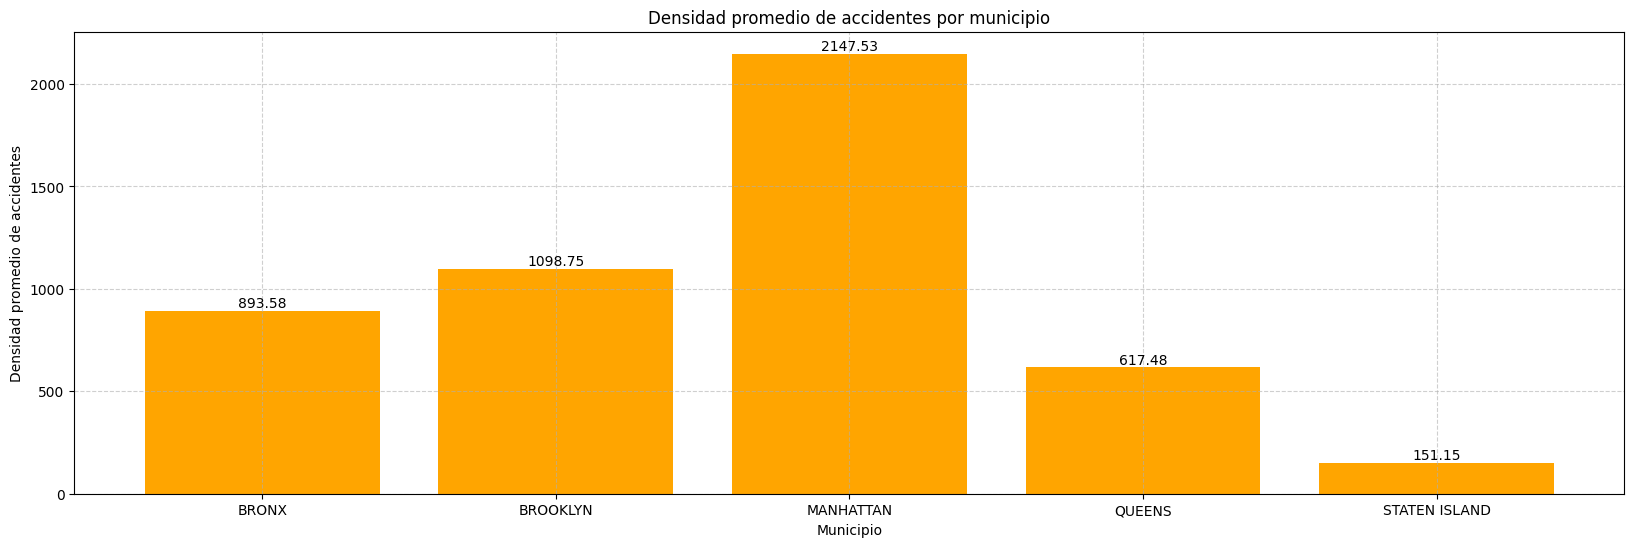

In [ ]:
# Gráfica 2: número total de accidentes por milla cuadrada (área) en cada municipio (Columna Densidad)
acc_municipio_area = df_imputacion.groupby("BOROUGH").agg({"NUMBER OF ACCIDENTS": "size", "DENSITY": "mean"}).reset_index()

# Condiciones gráfico
plt.figure(figsize=(20, 6))
plt.bar(acc_municipio_area["BOROUGH"], acc_municipio_area["DENSITY"], color='orange')

#Etiquetas
plt.xlabel('Municipio')
plt.ylabel('Densidad promedio de accidentes')
plt.title('Densidad promedio de accidentes por municipio')
plt.grid(True, linestyle="--", alpha=0.6)

# agregar las etiquetas a los marcadores de los meses
for x, y in zip(acc_municipio_area["BOROUGH"], acc_municipio_area["DENSITY"]):
    plt.text(x, y, f"{y:.2f}", fontsize=10, ha='center', va='bottom')
plt.show()

**Respuesta:**

Los municipios con mayor número de accidentes son Brooklyn y Queens. Ambos municipos cuentan con las áreas más grandes: 69.4 y 108.7 millas cuadradas, respectivamente. Además, es probable que estos municipios también tengan una mayor población en comparación con los demás (Bronx, Manhattan y Staten Island).

Sin embargo, al calcular la densidad de accidentes (número de accidentes / área del municipio), se observa que Manhattan es el municipio con mayor número de accidentes. Este es el municipio de menor área (22.7 millas cuadradas) en comparación con los demás.

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

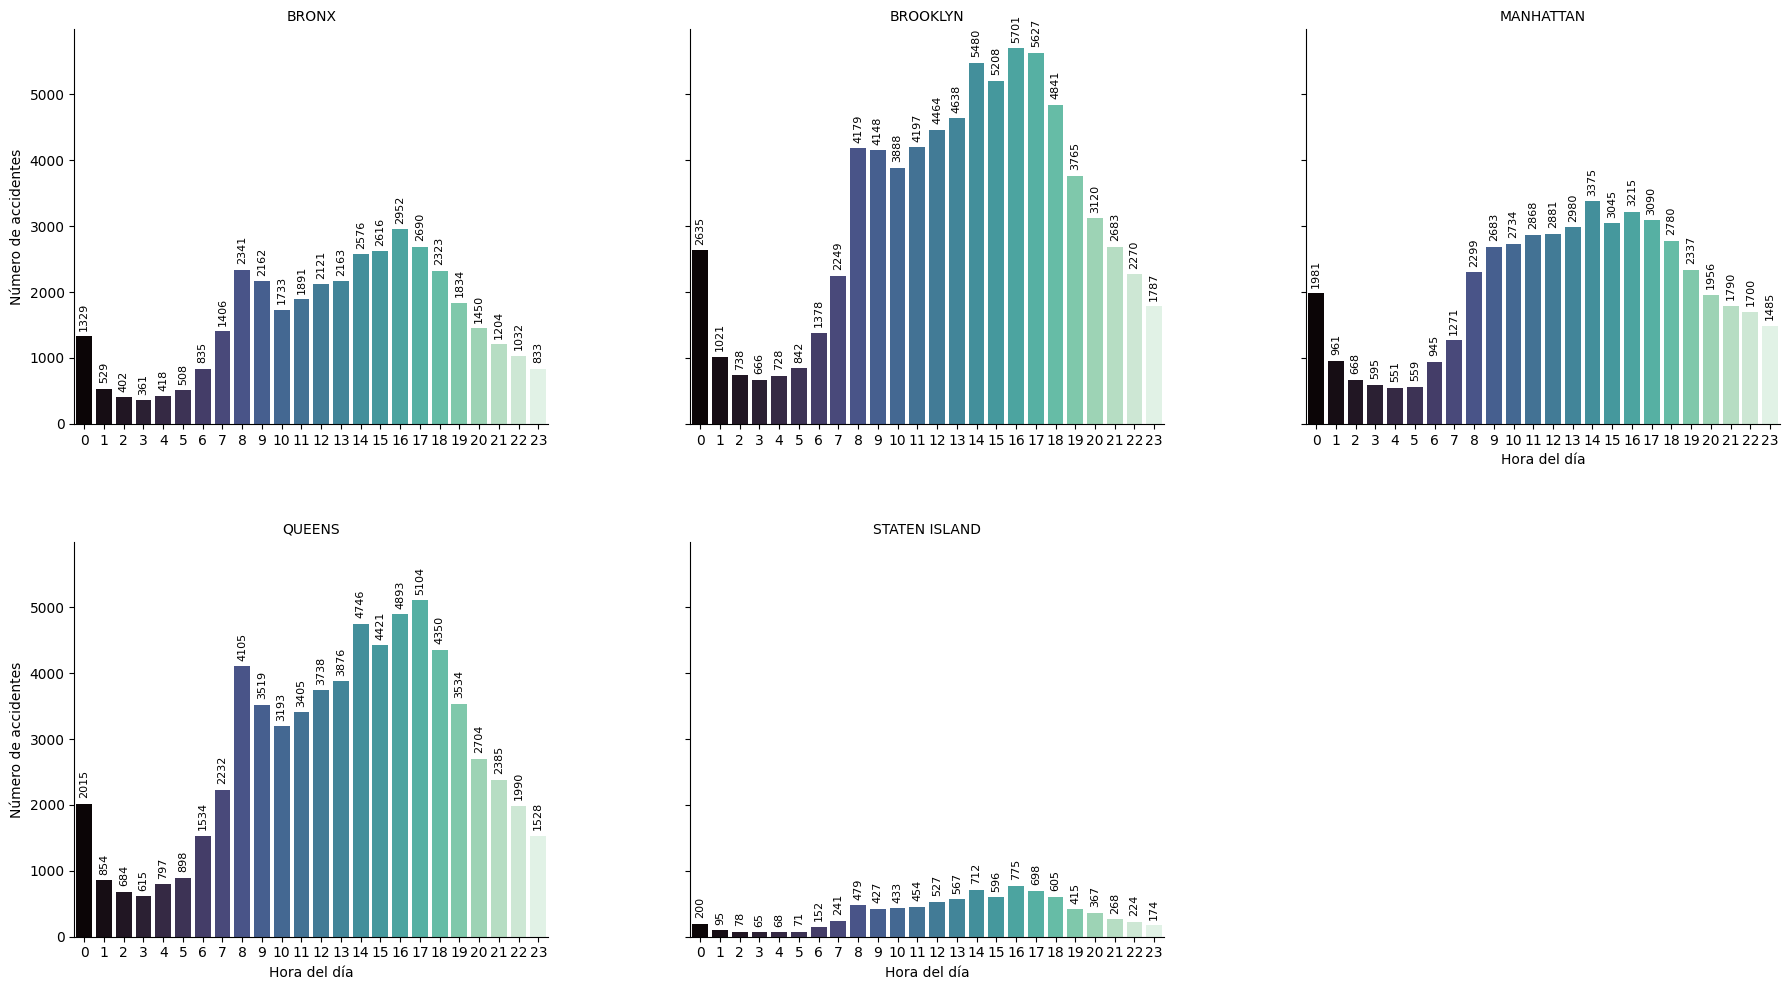

In [ ]:
# Solución propuesta
import seaborn as sns
import matplotlib.ticker as mticker

# Horas que tienen más accidentes en cada municipio
horas_mun_acc = df_imputacion.groupby(["BOROUGH", "HOUR"]).size().reset_index(name="NUMBER OF ACCIDENTS")

# configuración de la cuadricula de parcelas
graf = sns.FacetGrid(horas_mun_acc, col="BOROUGH", col_wrap=3, sharex=False, sharey=True, height=5, aspect=1.2)

# Grafico de barras
graf.map_dataframe(sns.barplot, x="HOUR", y="NUMBER OF ACCIDENTS", order=range(24), hue="HOUR", estimator=sum, palette="mako")

# agregar las etiquetas a las barras
for ax in graf.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.0f", fontsize=8, label_type="edge", padding=4, rotation=90)

graf.set_axis_labels("Hora del día", "Número de accidentes")
graf.set_titles(col_template="{col_name}")

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

**Pregunta: ¿Qué horas tienen más accidentes en cada municipio?**
**Pregunta: ¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

El mayor número de accidentes en un día se presenta entre las 3 y las 6pm, el pico de accidentes en este rango horario es común para todos los municipios.

Además, es posible ver una tendencia creciente entre las 8 y 9am para todos. Que se puede pensar que este relacionada con el inicio de las actividades laborales o escolares.

En general, podría ser útil investigar si esta tendencia está vinculada a factores como el tráfico en horas pico, cambios en las condiciones climáticas o comportamientos específicos durante esas horas.

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

In [ ]:
# Solución propuesta

# Extraer las columnas del dataset con los factores de accidentalidad
factor_type_cols = [col for col in df_imputacion.columns if col.startswith('CONTRIBUTING FACTOR VEHICLE')]

# Crear un nuevo dataset con estas variables
factor_type = df_imputacion[factor_type_cols]

factores_unicos = factor_type.apply(lambda row: set(row), axis=1)

factores_aplanados = [factor for fila in factores_unicos for factor in fila if factor != "Unspecified"]

# Mostrar el resultado
conteo_factores = pd.Series(factores_aplanados).value_counts()
print(conteo_factores)

Driver Inattention/Distraction                           61752
Failure to Yield Right-of-Way                            19641
Following Too Closely                                    17293
Backing Unsafely                                         14835
Passing Too Closely                                      12631
Passing or Lane Usage Improper                           11808
Other Vehicular                                           8860
Unsafe Lane Changing                                      6643
Turning Improperly                                        6626
Traffic Control Disregarded                               4687
Driver Inexperience                                       4152
Unsafe Speed                                              3469
Reaction to Uninvolved Vehicle                            3034
Alcohol Involvement                                       2491
View Obstructed/Limited                                   2345
Oversized Vehicle                                      

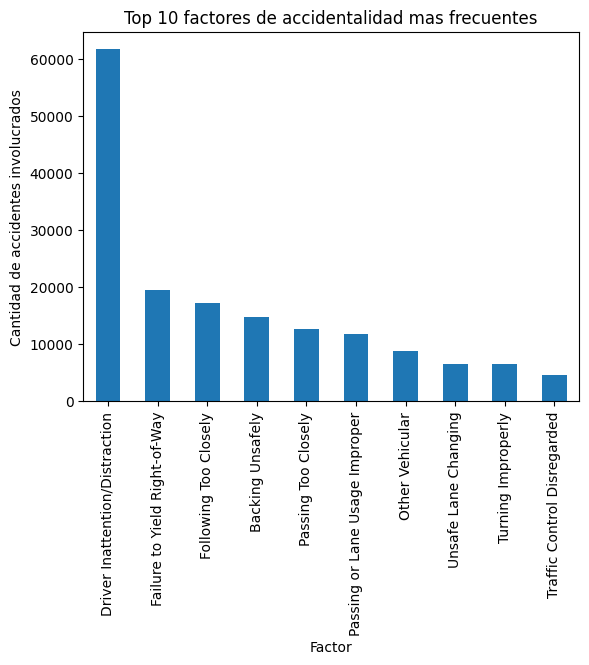

In [ ]:
conteo_factores = conteo_factores.loc[conteo_factores.index != 'Unspecified']

# Se grafican los 10 factores de accidentalidad mas frecuentes
conteo_factores.head(10).plot(kind='bar')
plt.xlabel('Factor')
plt.ylabel('Cantidad de accidentes involucrados')
plt.title('Top 10 factores de accidentalidad mas frecuentes')
plt.show()

**¿Qué factores provocan la mayoría de los accidentes?**

Los principales factores que contribuyen a los accidentes son la falta de atención del conductor/la distracción, no ceder el derecho de pago, estar muy cerca al otro, retroceder de manera insegura, uso indebido de carril y adelantar demasiado cerca.

Todos los factores están relacionados con la conducta del conductor, lo que sugiere la necesidad de implementar planes de concienciación y educación vial para reducir los accidentes.

### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

In [ ]:
# Solución propuesta

# Extraer los nombres de las columnas que contienen el tipo de vehiculo y el municipio
vehicle_type_cols = [col for col in df_imputacion.columns if col.startswith('VEHICLE TYPE CODE') or col == 'BOROUGH']

# Extraer los datos de acuerdo con la seleccion de columnas realizado
vehicle_type_borough = df_imputacion[vehicle_type_cols]

def contar_factores_unicos(group):
    # Eliminar la columna 'BOROUGH'
    group_sin_borough = group.drop(columns='BOROUGH')

    # Para cada fila en el grupo, encontrar los factores únicos
    factores_unicos_por_fila = group_sin_borough.apply(lambda row: set(row), axis=1)

    # Aplanar la lista de factores únicos de cada fila y contar las apariciones
    factores_aplanados = [factor for fila in factores_unicos_por_fila for factor in fila]

    # Contar cuántas veces aparece cada factor y ver de los 5 más comunes
    conteo = pd.Series(factores_aplanados).value_counts()

    # Eliminar el tipo de vehiculo faltante
    if 'unknown' in conteo.index:
        conteo = conteo.drop('unknown')

    return conteo

# Paso 2: Aplicar la función para cada grupo de 'BOROUGH'
conteo_factores_borough = vehicle_type_borough.groupby('BOROUGH').apply(contar_factores_unicos)

# Ver el listado
print(conteo_factores_borough)

BOROUGH                                           
BRONX          Unknown                                37593
               Sedan                                  19652
               Station Wagon/Sport Utility Vehicle    15434
               PASSENGER VEHICLE                       4941
               SPORT UTILITY / STATION WAGON           3751
                                                      ...  
STATEN ISLAND  Flat Rack                                  1
               FRHT                                       1
               UTILI                                      1
               dumps                                      1
               forkl                                      1
Name: count, Length: 1375, dtype: int64


<ipython-input-30-e062de8627bb>:29: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [X] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

In [ ]:
# Solución propuesta

# Número de muertes en el primer semestre de 2019
df_trimestre = df_imputacion[(df_imputacion["YEAR"] == 2019) & (df_imputacion["MONTH"].between(1, 3))]

df_muertes = df_trimestre[
    (df_trimestre["NUMBER OF PEDESTRIANS KILLED"] > 0) |
    (df_trimestre["NUMBER OF CYCLIST KILLED"] > 0)
]

In [ ]:
# unir los factores contributivos
factores_unido = pd.concat([
    df_muertes[["COLLISION_ID", "CONTRIBUTING FACTOR VEHICLE 1"]].rename(columns={"CONTRIBUTING FACTOR VEHICLE 1": "FACTOR_CONTRIBUTIVO"}),
    df_muertes[["COLLISION_ID", "CONTRIBUTING FACTOR VEHICLE 2"]].rename(columns={"CONTRIBUTING FACTOR VEHICLE 2": "FACTOR_CONTRIBUTIVO"}),
    df_muertes[["COLLISION_ID", "CONTRIBUTING FACTOR VEHICLE 3"]].rename(columns={"CONTRIBUTING FACTOR VEHICLE 3": "FACTOR_CONTRIBUTIVO"}),
    df_muertes[["COLLISION_ID", "CONTRIBUTING FACTOR VEHICLE 4"]].rename(columns={"CONTRIBUTING FACTOR VEHICLE 4": "FACTOR_CONTRIBUTIVO"}),
    df_muertes[["COLLISION_ID", "CONTRIBUTING FACTOR VEHICLE 5"]].rename(columns={"CONTRIBUTING FACTOR VEHICLE 5": "FACTOR_CONTRIBUTIVO"}),
], ignore_index=True)

factores_unido = factores_unido.dropna()
factores_unido = factores_unido[factores_unido["FACTOR_CONTRIBUTIVO"] != "Unspecified"]

In [ ]:
conteo_muertes = (
    factores_unido[["COLLISION_ID", "FACTOR_CONTRIBUTIVO"]]
    .groupby("FACTOR_CONTRIBUTIVO")["COLLISION_ID"]
    .nunique()
    .reset_index()
)
conteo_muertes.columns = ["FACTOR_CONTRIBUTIVO", "COLLISION_ID"]

# Mostrar el número de muertes por factor
print(conteo_muertes.sort_values(by="FACTOR_CONTRIBUTIVO", ascending=True).head(10))

                                 FACTOR_CONTRIBUTIVO  COLLISION_ID
0                                Alcohol Involvement             1
1                                   Backing Unsafely             1
2                     Driver Inattention/Distraction             9
3                         Driverless/Runaway Vehicle             1
4                      Failure to Yield Right-of-Way             6
5                                    Other Vehicular             1
6  Pedestrian/Bicyclist/Other Pedestrian Error/Co...             2
7                        Traffic Control Disregarded             1
8                                       Unsafe Speed             1


In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
# Mapas
# Filtrar los datos para el primer trimestre de 2018 y 2019
df_filtro_map = df_imputacion[(df_imputacion["YEAR"].isin([2018, 2019])) & (df_imputacion["MONTH"].isin([1, 2, 3]))]

# Filtrar accidentes que involucraron peatones o ciclistas lesionados/muertos
df_filtro_map = df_filtro_map[
    (df_filtro_map["NUMBER OF PEDESTRIANS INJURED"] > 0) |
    (df_filtro_map["NUMBER OF PEDESTRIANS KILLED"] > 0) |
    (df_filtro_map["NUMBER OF CYCLIST INJURED"] > 0) |
    (df_filtro_map["NUMBER OF CYCLIST KILLED"] > 0)
]

for year in [2018, 2019]:
    df_year = df_filtro_map[df_filtro_map["YEAR"] == year]
    mapa = folium.Map(location=[df_year["LATITUDE"].mean(), df_year["LONGITUDE"].mean()], zoom_start=12)

    # Agregar puntos de calor
    heat_data = df_year[["LATITUDE", "LONGITUDE"]].dropna().values.tolist()
    HeatMap(heat_data).add_to(mapa)

    # Guardar el mapa en un archivo HTML
    mapa.save(f"mapa_accidentes_{year}.html")
    print(f"Mapa de calor de accidentes {year} guardado como 'mapa_accidentes_{year}.html'")

# Analizar factores en las áreas críticas
factor_cols = [col for col in df_filtro_map.columns if col.startswith("CONTRIBUTING FACTOR VEHICLE")]

# Transformar el dataframe en formato largo (una fila por cada factor)
factores_largos = df_filtro_map.melt(id_vars=["COLLISION_ID"],
                                     value_vars=factor_cols,
                                     value_name="FACTOR_CONTRIBUTIVO")

# Eliminar valores NaN y "Unspecified"
factores_largos = factores_largos.dropna()
factores_largos = factores_largos[factores_largos["FACTOR_CONTRIBUTIVO"] != "Unspecified"]

# Contar la cantidad de accidentes por factor contribuyente
factores_criticos = factores_largos.groupby("FACTOR_CONTRIBUTIVO")["COLLISION_ID"].nunique()

# Ordenar de mayor a menor
factores_criticos = factores_criticos.sort_values(ascending=False)

# Mostrar los factores más comunes
print(factores_criticos.head(10))

Mapa de calor de accidentes 2018 guardado como 'mapa_accidentes_2018.html'
Mapa de calor de accidentes 2019 guardado como 'mapa_accidentes_2019.html'
FACTOR_CONTRIBUTIVO
Driver Inattention/Distraction                           1362
Failure to Yield Right-of-Way                            1261
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion     266
Backing Unsafely                                          188
Traffic Control Disregarded                               101
View Obstructed/Limited                                    96
Passing or Lane Usage Improper                             78
Unsafe Speed                                               56
Other Vehicular                                            55
Passing Too Closely                                        45
Name: COLLISION_ID, dtype: int64


**Pregunta:**
¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?

**Respuesta:**

La información suministrada no permite saber cuales son las medidas que se tomaron para reducir la accidentalidad en los cinco municipios. Como se menciono anteriormente hay multiples factores relacionados principalmente con los conductores.

Los mapas de calor no permiten realizar una interpretación correcta de los cambios que pueden existir en los factores de la acccidentalidad y el contexto de las demás variables.

### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

In [ ]:
# Solución propuesta

# Extraer los nombres de las columnas que contienen cantidad de muertos
vehicle_type_kills_cols = [col for col in df_imputacion.columns if col.startswith('VEHICLE TYPE CODE') or col.endswith('KILLED')]

# Extraer los datos de acuerdo con la seleccion de columnas realizado
vehicle_type_kills = df_imputacion[vehicle_type_kills_cols]

# Totalizar las muertes
vehicle_type_kills['TOTAL KILLS'] = vehicle_type_kills['NUMBER OF PEDESTRIANS KILLED'] + vehicle_type_kills['NUMBER OF CYCLIST KILLED'] + vehicle_type_kills['NUMBER OF MOTORIST KILLED']

# Eliminar las columnas de muertes individuales
vehicle_type_kills = vehicle_type_kills.drop(['NUMBER OF PEDESTRIANS KILLED',
                                              'NUMBER OF CYCLIST KILLED',
                                              'NUMBER OF MOTORIST KILLED'], axis = 1)

# Imprimir las primeras filas
print(vehicle_type_kills.head())

  VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0               Sedan                              Unknown   
1               Sedan                              Unknown   
2               Sedan                              Unknown   
3                Bike  Station Wagon/Sport Utility Vehicle   
4               Sedan                                Sedan   

  VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  TOTAL KILLS  
0             Unknown             Unknown             Unknown            0  
1             Unknown             Unknown             Unknown            0  
2             Unknown             Unknown             Unknown            0  
3             Unknown             Unknown             Unknown            0  
4             Unknown             Unknown             Unknown            0  


<ipython-input-37-1ff6c0f9de18>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Contraer las variables de tipo de vehiculo en una sola totalizando 'TOTAL KILLS' y ordenar ded mayor a menor
vehicle_type_kills_agg = pd.melt(vehicle_type_kills, id_vars = 'TOTAL KILLS').groupby('value')['TOTAL KILLS'].sum().sort_values(ascending = False)

# Ver los 10 mas frecuentes
print(vehicle_type_kills_agg.head(10))

value
Unknown                                748
Station Wagon/Sport Utility Vehicle    100
Sedan                                   79
PASSENGER VEHICLE                       33
SPORT UTILITY / STATION WAGON           26
Motorcycle                              22
Bike                                    19
Bus                                     10
Box Truck                                8
Pick-up Truck                            8
Name: TOTAL KILLS, dtype: int64


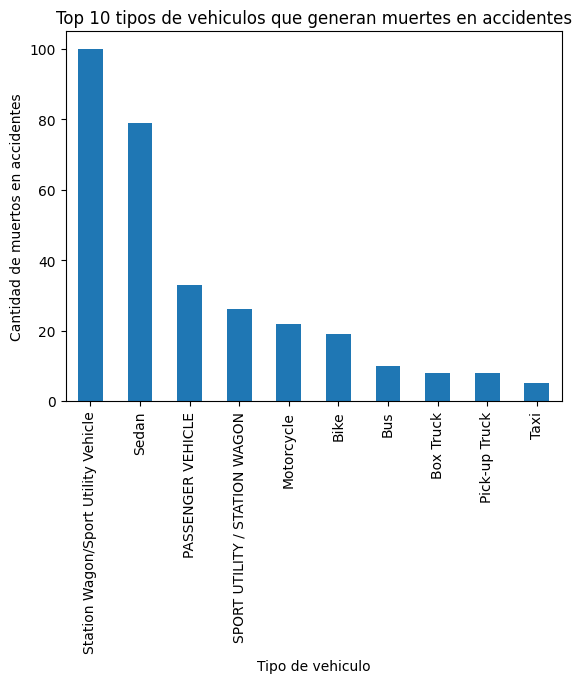

In [ ]:
vehicle_type_kills_agg = vehicle_type_kills_agg.loc[vehicle_type_kills_agg.index != 'Unknown']

# Se grafican los 10 factores de accidentalidad mas frecuentes
vehicle_type_kills_agg.head(10).plot(kind='bar')
plt.xlabel('Tipo de vehiculo')
plt.ylabel('Cantidad de muertos en accidentes')
plt.title('Top 10 tipos de vehiculos que generan muertes en accidentes')
plt.show()